In [2]:
import numpy as np
from sklearn.decomposition import PCA
from numpy import linalg as LA
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import math as m 

file = open('PM10.txt','r')
data = file.read()

In [3]:
PM10 =[]
import csv
with open('PM10.txt', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    day_i = []
    for i,row in enumerate(csv_reader):
        rem = i%48
        day_i.append(float(row["PM GR"]))
        if(rem == 47):
            PM10.append(day_i)
            day_i = []
PM10 = np.asarray(PM10)

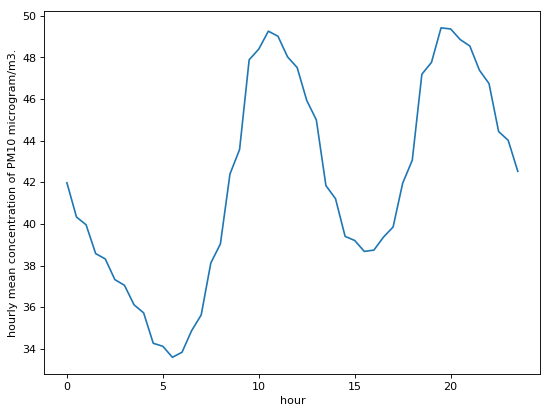

In [4]:
hourly_mean = np.mean(PM10,axis=0)
hours = [i/2 for i in range(48)]


figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours, hourly_mean)
plt.xlabel('hour')
plt.ylabel('hourly mean concentration of PM10 microgram/m3.')
plt.show()

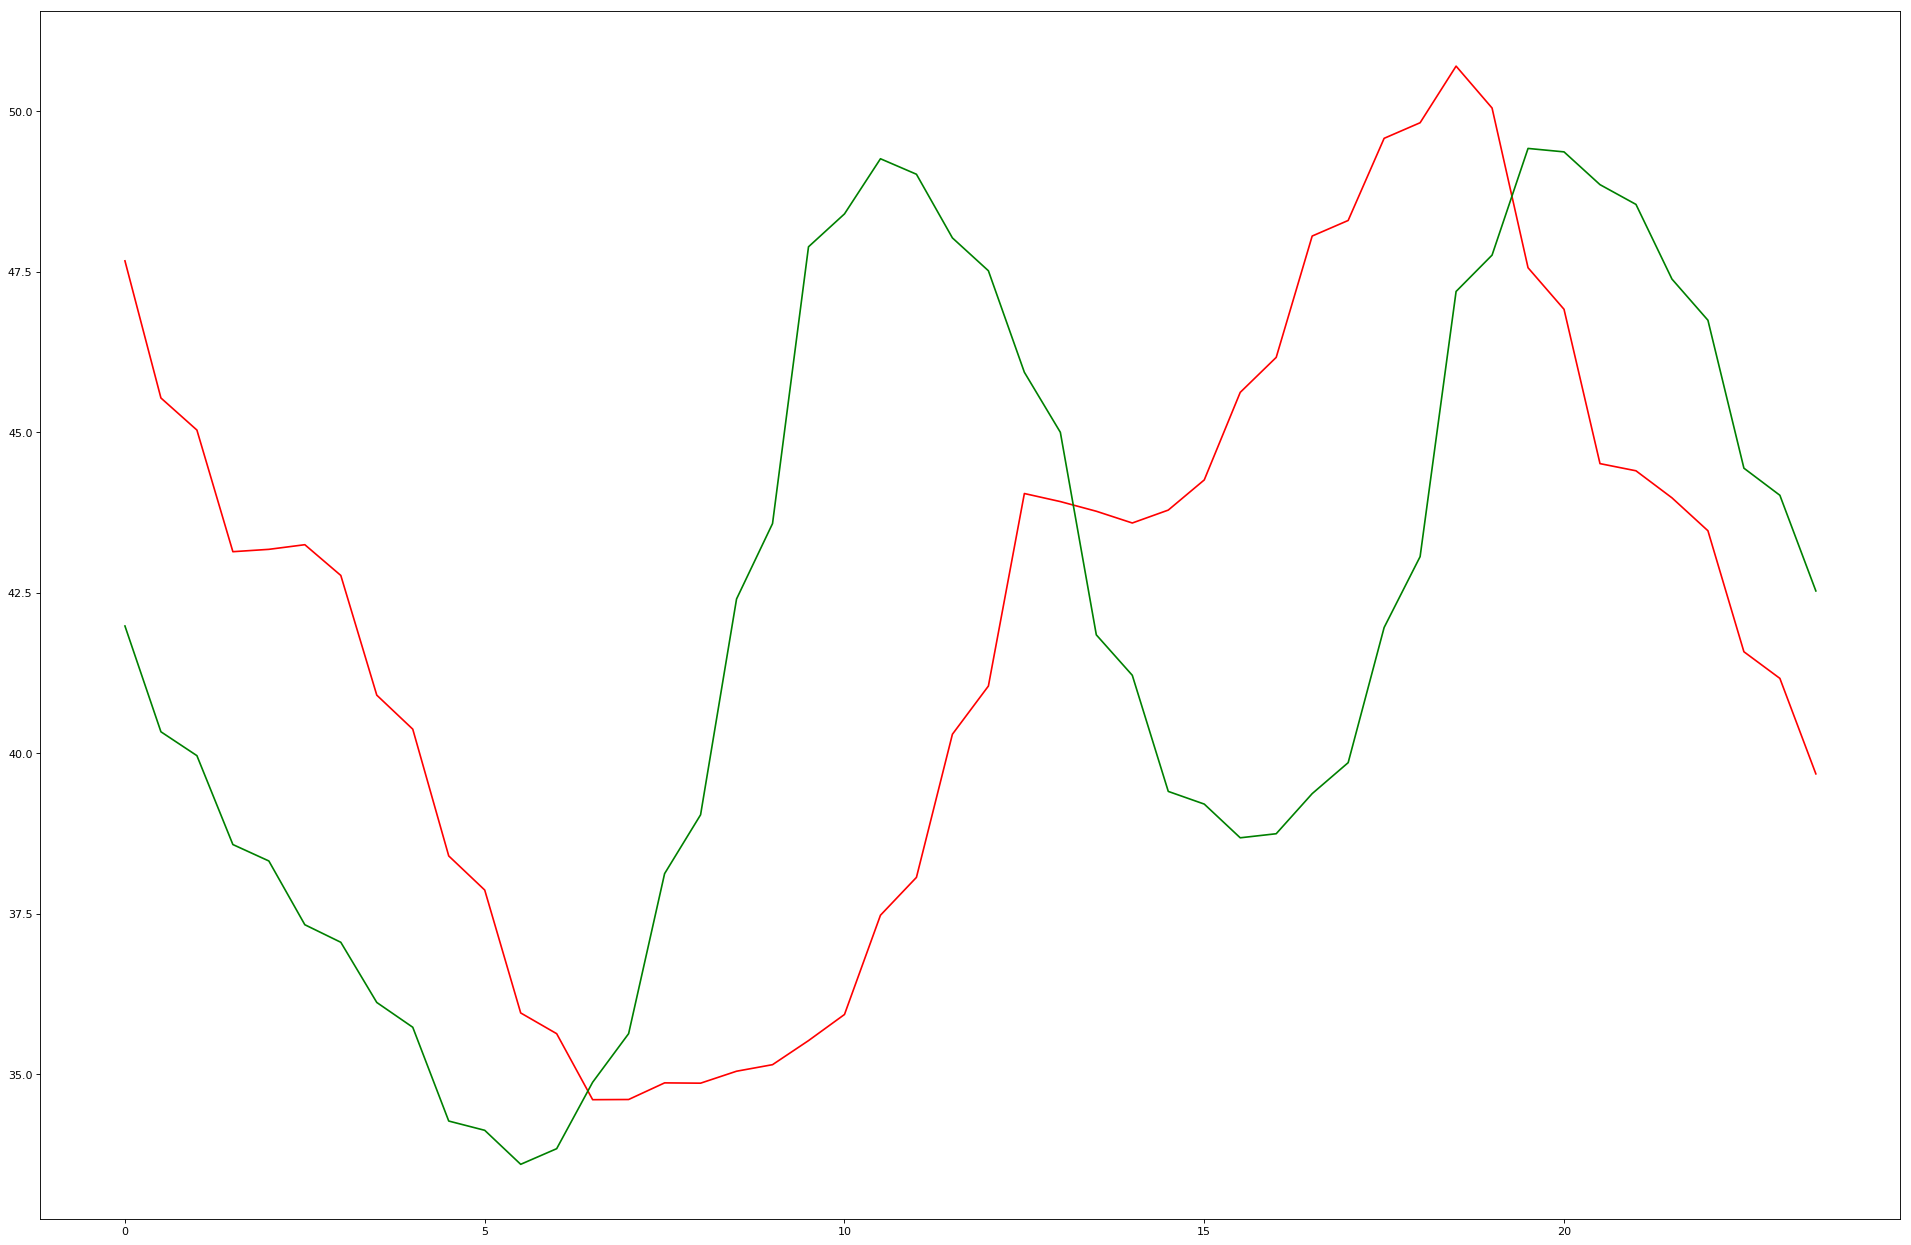

In [25]:
S = np.cov(PM10.transpose())

eigenValues, eigenVectors = LA.eig(S)
idx = eigenValues.argsort()[::-1]   
eigenValues= eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
eigenVectors = eigenVectors.transpose()

mean_plus = np.zeros((48, 48))
mean_minus = np.zeros((48, 48))
for i in range(48):
    mean_plus[i] = hourly_mean
    mean_minus[i] = hourly_mean

for i,vec in enumerate(eigenVectors): 
    mean_plus[i] += m.sqrt(eigenValues[i])*vec
    mean_minus[i] -= m.sqrt(eigenValues[i])*vec

figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
for i in range(2,3):
    plt.plot(hours,  mean_plus[i,:],'r', alpha=1)
    #plt.plot(hours,  mean_minus[i,:],'b', alpha=1)
plt.plot(hours, hourly_mean, 'g')


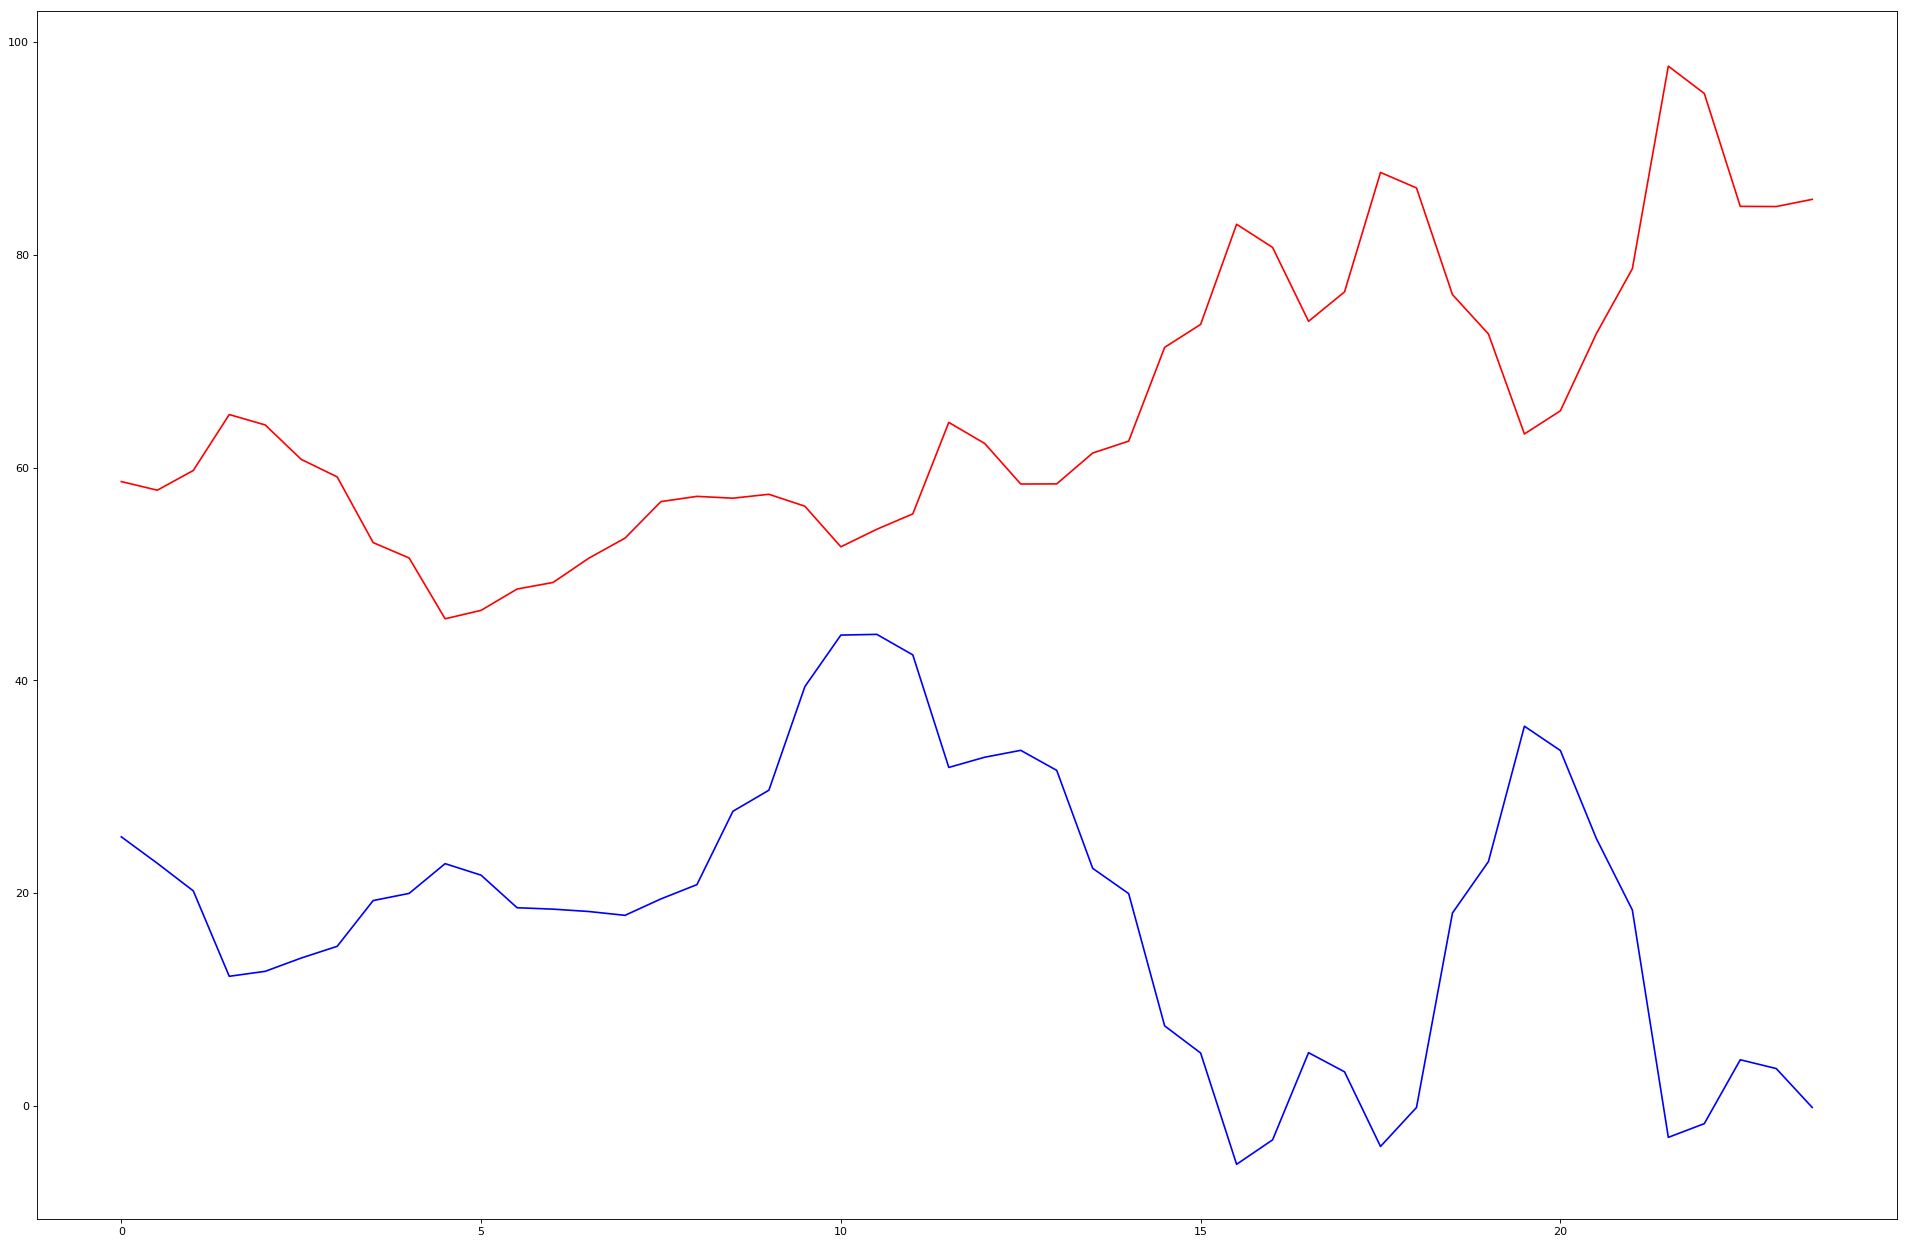

In [22]:
mean_plus = np.zeros((48, 48))
mean_minus = np.zeros((48, 48))
for i in range(48):
    mean_plus[i] = hourly_mean
    mean_minus[i] = hourly_mean

for i,vec in enumerate(eigenVectors): 
    mean_plus[0] += m.sqrt(eigenValues[i])*vec
    mean_minus[0] -= m.sqrt(eigenValues[i])*vec

figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
for i in range(1):
    plt.plot(hours,  mean_plus[i,:],'r', alpha=1)
    plt.plot(hours,  mean_minus[i,:],'b', alpha=1)

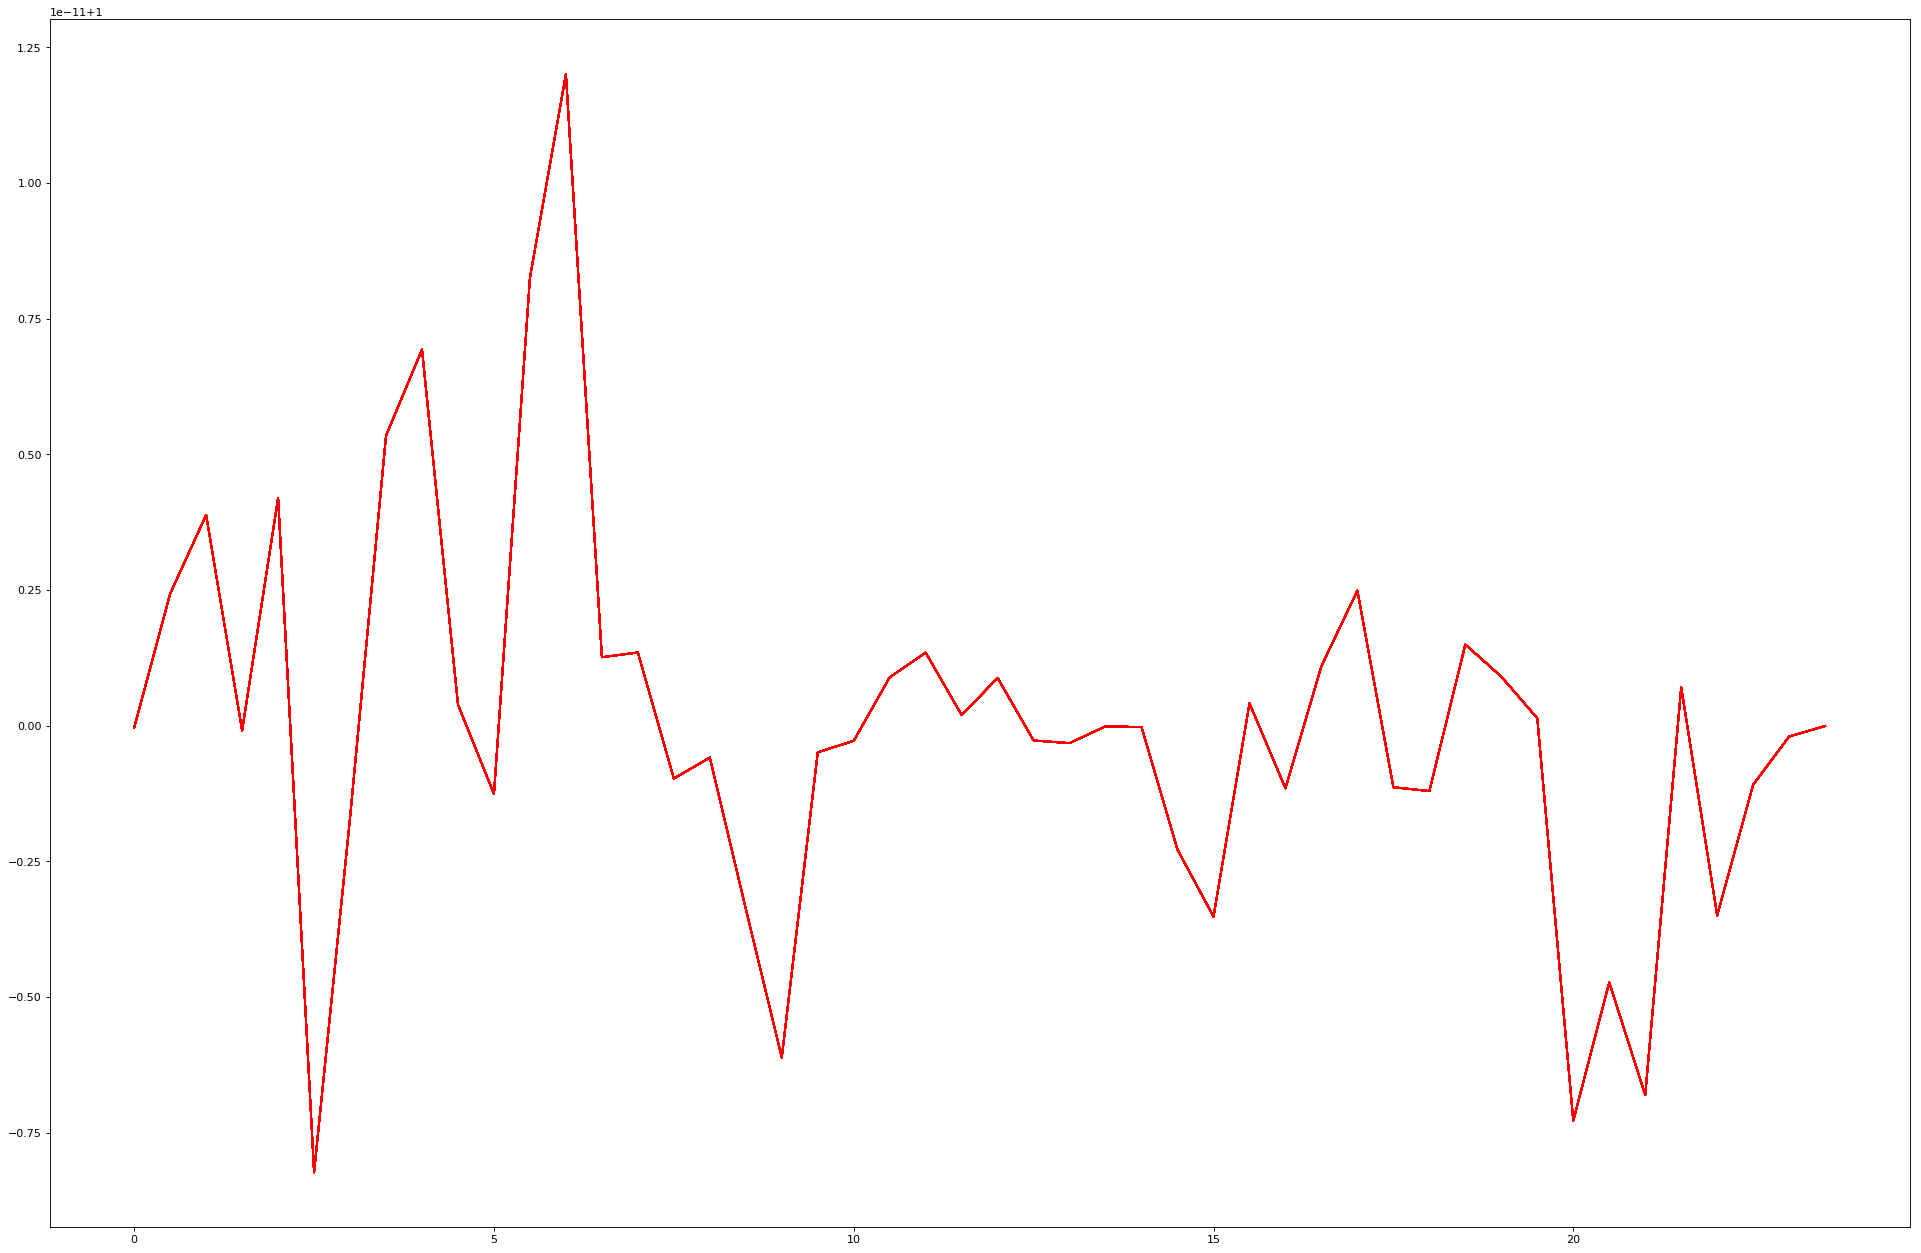

In [23]:
figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
for i in range(48):
    plt.plot(hours, LA.norm(eigenVectors,axis=0),'r', alpha=1)